In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import requests

from urllib.request import HTTPError
from sklearn.linear_model import LinearRegression

In [14]:
confirmed_global = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
confirmed_us = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")
confirmed_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,852,852,852,852,852,852,852,852,853,853
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,86,86,88,91,92,96,113,118,130,138


In [15]:
deaths_global = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
deaths_us = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv")
deaths_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,300,309,327,357,369,384,405,426,446,451
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,33,33,34,34,34,34,34,35,36,36
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,681,690,698,707,715,724,732,741,751,760
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,4,4,4,4,4,4,5,5,6


In [16]:
# recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv.csv")
# recovered.head()

In [17]:
try:
#     testing_us = pd.read_csv("https://covidtracking.com/api/us/daily.csv")
    r = requests.get(url = "https://covidtracking.com/api/us/daily")
    data = r.json() 
    testing_us = pd.DataFrame(data)
    testing_us.to_csv("testing_us.csv", index=False)
except HTTPError: #This will happen if I spam the server and get temp blocked
    print("Request blocked")

In [18]:
try:
    testing_us = pd.read_csv("testing_us.csv")
    testing_us["date"] = pd.to_datetime(testing_us["date"], format="%Y%m%d")
    testing_us = testing_us[["date", "total"]].set_index("date").rename(columns={"total": "tested"})
except HTTPError: #This will happen if I spam the server and get temp blocked
    print("File not found")
testing_us.tail()

,tested
date,
2020-01-26,1
2020-01-25,1
2020-01-24,1
2020-01-23,1
2020-01-22,1


In [20]:
confirmed_global.columns.values

array(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20',
       '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20',
       '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20',
       '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20',
       '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20',
       '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20',
       '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20',
       '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20',
       '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20',
       '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20',
       '4

In [26]:
confirmed_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,852,852,852,852,852,852,852,852,853,853
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,86,86,88,91,92,96,113,118,130,138


In [43]:
confirmed_global = pd.concat([confirmed_global.loc[:, ["Country/Region"]], confirmed_global.loc[:, "1/22/20":]], axis=1)
confirmed_global = confirmed_global.groupby(["Country/Region"]).sum().reset_index()
assert(len(confirmed_global) == confirmed_global["Country/Region"].nunique())

In [22]:
confirmed_us.columns.values

array(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', '1/22/20',
       '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20',
       '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20',
       '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20',
       '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20',
       '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20',
       '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20',
       '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20',
       '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20',
  

In [38]:
confirmed_us.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,179,179,179,179,179,180,180,183,183,183
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,26,26,26,27,28,30,30,30,30,30
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,4508,4620,4915,4985,5046,5185,5329,5352,5536,5690
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,71,71,71,71,71,71,72,72,72,72


In [45]:
confirmed_us = pd.concat([confirmed_us.loc[:, ["Province_State"]], confirmed_us.loc[:, "1/22/20":]], axis=1)
confirmed_us = confirmed_us.groupby(["Province_State"]).sum().reset_index()
assert(len(confirmed_us) == confirmed_us["Province_State"].nunique())

In [53]:
confirmed_us.set_index("Province_State")

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,19072,19387,20043,20500,20925,21422,21989,22845,23710,24601
Alaska,0,0,0,0,0,0,0,0,0,0,...,512,523,535,543,562,572,592,609,624,653
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,1,1,1,1,1,1,...,22886,24439,25451,26989,27678,28296,29852,31267,33039,34660
Arkansas,0,0,0,0,0,0,0,0,0,0,...,8425,8651,9101,9426,9740,10080,10368,10816,11547,12095
California,0,0,0,0,2,2,2,2,2,3,...,122168,125738,128593,130615,133816,136641,139715,143377,146659,150018
Colorado,0,0,0,0,0,0,0,0,0,0,...,27346,27601,27834,27987,28169,28333,28484,28632,28807,29002
Connecticut,0,0,0,0,0,0,0,0,0,0,...,43239,43460,43818,43968,44092,44179,44347,44461,44689,44994
Delaware,0,0,0,0,0,0,0,0,0,0,...,9746,9773,9845,9942,9972,10020,10056,10106,10173,10229


In [ ]:
confirmed_us = confirmed_us.drop(columns=drop_columns).sum()
confirmed_us.index = pd.to_datetime(confirmed_us.index)
deaths_us = deaths_us.drop(columns=drop_columns).sum()
deaths_us.index = pd.to_datetime(deaths_us.index)

In [ ]:
stats_us = pd.concat([testing_us, confirmed_us, deaths_us], axis=1).rename(columns={0: "confirmed", 1: "deaths"})
stats_us = stats_us.rename_axis("date")
stats_us["mortality_rate"] = stats_us["deaths"]/stats_us["confirmed"]
stats_us.index = pd.to_datetime(stats_us.index)
stats_us = stats_us.sort_index()
# stats_us = stats_us.fillna(0.0)
stats_us.tail()

In [ ]:
start_date = pd.Timestamp("2020-03-01")

stats_us = stats_us[stats_us.index >= start_date]

In [ ]:
# Create figure with secondary y-axis
fig = make_subplots(rows=2, cols=1, specs=[[{}], [{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=stats_us.index, y=stats_us["tested"], name="tested"), row=1, col=1
)

fig.add_trace(
    go.Scatter(x=stats_us.index, y=stats_us["confirmed"], name="confirmed"), row=1, col=1
)

fig.add_trace(
    go.Scatter(x=stats_us.index, y=stats_us["deaths"], name="deaths"), row=2, col=1
)

fig.add_trace(
    go.Scatter(x=stats_us.index, y=stats_us["mortality_rate"]*100.0, name="mortality rate [%]"), row=2, col=1,
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="COVID-19 Cases and Mortality Rate (Deaths/Confirmed) for United States",
    yaxis_type="linear"
)


# Set y-axes titles
fig.update_yaxes(title_text="<b>#<br>people</b> ", secondary_y=False)
fig.update_yaxes(title_text="<b>%</b><br>", secondary_y=True)

fig.show()

In [ ]:
confirmed["Province/State"].sort_values().unique()

In [ ]:
confirmed_ga = confirmed[confirmed["Province/State"] == "Georgia"]
deaths_ga = deaths[deaths["Province/State"] == "Georgia"]

In [ ]:
drop_columns = ["Province/State", "Country/Region", "Lat", "Long"]
confirmed_ga = confirmed_ga.drop(columns=drop_columns).sum()
confirmed_ga.index = pd.to_datetime(confirmed_ga.index)
deaths_ga = deaths_ga.drop(columns=drop_columns).sum()
deaths_ga.index = pd.to_datetime(deaths_ga.index)

In [ ]:
stats_ga = pd.concat([confirmed_ga, deaths_ga], axis=1).rename(columns={0: "confirmed", 1: "deaths"})
stats_ga = stats_ga.rename_axis("date")
stats_ga["mortality_rate"] = stats_ga["deaths"]/stats_ga["confirmed"]
stats_ga.index = pd.to_datetime(stats_ga.index)
stats_ga = stats_ga.sort_index()

In [ ]:
fig = make_subplots(rows=2, cols=1, specs=[[{}], [{"secondary_y": True}]])

color_sequence = px.colors.qualitative.Plotly

# Add traces
fig.add_trace(
    go.Scatter(x=stats_ga.index, y=stats_ga["confirmed"], name="confirmed", line=dict(color=color_sequence[1])), row=1, col=1
)

fig.add_trace(
    go.Scatter(x=stats_ga.index, y=stats_ga["deaths"], name="deaths", line=dict(color=color_sequence[2])), row=2, col=1
)

fig.add_trace(
    go.Scatter(x=stats_ga.index, y=stats_ga["mortality_rate"]*100.0, name="mortality rate [%]", line=dict(color=color_sequence[3])), row=2, col=1,
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="COVID-19 Cases and Mortality Rate (Deaths/Confirmed) for Georgia"
)


# Set y-axes titles
fig.update_yaxes(title_text="<b>#<br>people</b> ", secondary_y=False)
fig.update_yaxes(title_text="<b>%</b><br>", secondary_y=True)

fig.show()

In [55]:
r = requests.get(url = "https://api.github.com/repos/CSSEGISandData/COVID-19/contents/csse_covid_19_data/csse_covid_19_daily_reports")
data = r.json()

def return_url_from_file(item):
    if ".csv" in item["path"]:
        return item["download_url"]

download_urls = [return_url_from_file(item) for item in data]
download_urls = [item for item in download_urls if item != None]

In [56]:
reports = []
country_col = "country"
state_col = "state"
for download_url in download_urls:
    df = pd.read_csv(download_url)
    df.columns = [item.lower() for item in df.columns]
    df = df.rename(columns={"province/state": state_col, "province_state": state_col, "country/region": country_col, "country_region": country_col, "last update": "last_update"})
    df = df[["last_update", country_col, state_col, "confirmed", "deaths"]]
    reports.append(df)
report = pd.concat(reports, axis=0)

In [57]:
report = report.groupby(["last_update", "country", "state"]).sum().reset_index()
report

,last_update,country,state,confirmed,deaths
0,1/22/2020 17:00,Hong Kong,Hong Kong,0.0,0.0
1,1/22/2020 17:00,Macau,Macau,1.0,0.0
2,1/22/2020 17:00,Mainland China,Anhui,1.0,0.0
3,1/22/2020 17:00,Mainland China,Beijing,14.0,0.0
4,1/22/2020 17:00,Mainland China,Chongqing,6.0,0.0
...,...,...,...,...,...
21341,4/6/20 2:17,China,Zhejiang,1264.0,1.0
21342,4/6/20 2:21,China,Hubei,67803.0,3212.0
21343,4/6/20 2:36,China,Gansu,139.0,2.0
21344,4/6/20 5:30,China,Shanghai,536.0,6.0


In [58]:
report_us = report[report["country"] == "US"]
report_us = report_us[~(report_us["state"].str.contains(",") | report_us["state"].str.contains("Diamond") | report_us["state"].str.contains("Wuhan") | report_us["state"].str.contains("Recovered") | report_us["state"].str.contains("US") | report_us["state"].str.contains("Grand"))]
report_us["last_update"] = pd.to_datetime(report_us["last_update"])
report_us = report_us.set_index("last_update").sort_index()

In [59]:
all_states = list(report_us["state"].unique())
len(all_states)

58

In [60]:
all_states = report_us["state"].unique()
all_states.sort()
all_states

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Chicago', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii',
       'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Northern Mariana Islands',
       'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'United States Virgin Islands', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [66]:
state = "Georgia"
stats_state = report_us[report_us["state"] == state]
stats_state = stats_state.drop(columns=["country", "state"])
stats_state = stats_state[~stats_state.index.duplicated(keep='last')]
stats_state["mortality_rate"] = stats_state["deaths"]/stats_state["confirmed"]

In [67]:
stats_state

,confirmed,deaths,mortality_rate
last_update,,,
2020-03-10 03:53:03,17.0,0.0,0.000000
2020-03-11 18:52:03,23.0,0.0,0.000000
2020-03-11 20:00:00,42.0,1.0,0.023810
2020-03-12 21:39:10,31.0,1.0,0.032258
2020-03-14 17:53:03,66.0,1.0,0.015152
...,...,...,...
2020-06-10 04:07:00,53249.0,2285.0,0.042912
2020-06-11 03:33:41,53980.0,2329.0,0.043146
2020-06-12 05:09:52,54973.0,2375.0,0.043203


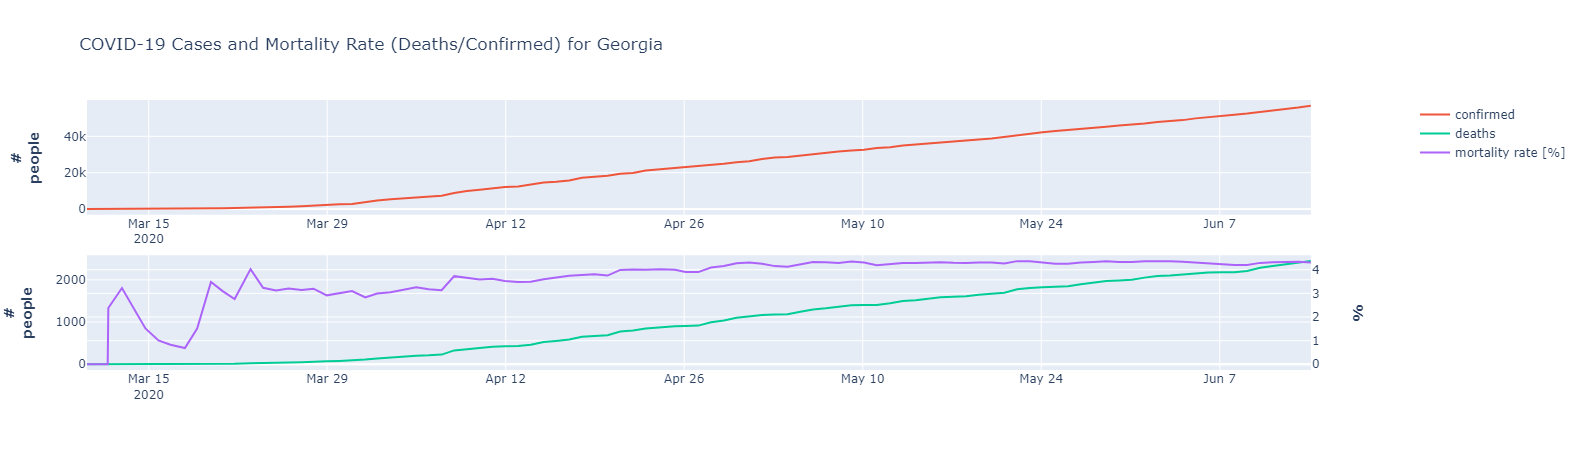

In [68]:
fig = make_subplots(rows=2, cols=1, specs=[[{}], [{"secondary_y": True}]])

color_sequence = px.colors.qualitative.Plotly

# Add traces
fig.add_trace(
    go.Scatter(x=stats_state.index, y=stats_state["confirmed"], name="confirmed", line=dict(color=color_sequence[1])), row=1, col=1
)

fig.add_trace(
    go.Scatter(x=stats_state.index, y=stats_state["deaths"], name="deaths", line=dict(color=color_sequence[2])), row=2, col=1
)

fig.add_trace(
    go.Scatter(x=stats_state.index, y=stats_state["mortality_rate"]*100.0, name="mortality rate [%]", line=dict(color=color_sequence[3])), row=2, col=1,
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="COVID-19 Cases and Mortality Rate (Deaths/Confirmed) for {}".format(state)
)

# Set y-axes titles
fig.update_yaxes(title_text="<b>#<br>people</b> ", secondary_y=False)
fig.update_yaxes(title_text="<b>%</b><br>", secondary_y=True)

fig.show()

In [71]:
report["last_update"] = pd.to_datetime(report["last_update"]).apply(lambda x: x.date())
report_globe = report.groupby(["last_update", "country"]).sum().reset_index()

In [76]:
report.head()

,last_update,country,state,confirmed,deaths
0,2020-01-22,Hong Kong,Hong Kong,0.0,0.0
1,2020-01-22,Macau,Macau,1.0,0.0
2,2020-01-22,Mainland China,Anhui,1.0,0.0
3,2020-01-22,Mainland China,Beijing,14.0,0.0
4,2020-01-22,Mainland China,Chongqing,6.0,0.0


In [77]:
report_us.head()

,country,state,confirmed,deaths
last_update,,,,
2020-01-22 17:00:00,US,Washington,1.0,0.0
2020-01-23 17:00:00,US,Washington,1.0,0.0
2020-01-24 17:00:00,US,Chicago,1.0,0.0
2020-01-24 17:00:00,US,Washington,1.0,0.0
2020-01-25 17:00:00,US,Illinois,1.0,0.0


In [78]:
report_globe.head()

,last_update,country,confirmed,deaths
0,2020-01-22,Hong Kong,0.0,0.0
1,2020-01-22,Macau,1.0,0.0
2,2020-01-22,Mainland China,547.0,17.0
3,2020-01-22,Taiwan,1.0,0.0
4,2020-01-22,US,1.0,0.0


In [72]:
mortality_global = deaths_global/confirmed_global

NameError: name 'confirmed' is not defined

In [ ]:
mortality_global.T

In [ ]:
confirmed_global.shape

In [ ]:
deaths_global.shape

In [ ]:
mortality_global.shape

In [ ]:
deaths_global.columns.values

In [ ]:
import os

In [ ]:
df_dict = {}
data_folder = "./data/unzipped"
for fn in os.listdir(data_folder):
    if ((".csv" in fn) & ("Metadata" not in fn)):
        df = pd.read_csv(os.path.join(data_folder, fn), skiprows=4)
        metric_name = df["Indicator Name"].iloc[0]
        unnamed_columns = [item for item in df.columns if "Unnamed" in item]
        df.drop(columns=["Indicator Code", "Indicator Name"] + unnamed_columns, inplace=True)
        df_dict[metric_name] = df        

In [ ]:
df_dict.keys()

In [ ]:
density = df_dict['Population density (people per sq. km of land area)']
hosp_beds = df_dict['Hospital beds (per 1,000 people)']
death_rate = df_dict['Death rate, crude (per 1,000 people)']
pop_15_64 = df_dict['Population ages 15-64 (% of total population)']
pop_65_up = df_dict['Population ages 65 and above (% of total population)']
pop = df_dict['Population, total']
urban = df_dict['Urban population (% of total population)']

In [ ]:
density.shape, hosp_beds.shape, death_rate.shape, pop_15_64.shape, pop_65_up.shape, pop.shape, urban.shape

In [ ]:
def interp_metric(row):
    row_valid = row.dropna()
    x = np.array([int(item) for item in row_valid.index]).reshape(-1, 1)
    y = row_valid.values
    x_new = np.array([2020]).reshape(1, -1)
    
    lm = LinearRegression()
    try:
        lm.fit(x, y)
        y_new = lm.predict(x_new)[0]
    except ValueError:
        y_new = np.nan
    return y_new

def interp_metric_2019(df):
    df = df.copy()
    df["2019"] = df[["2012", "2013", "2014", "2015", "2016", "2017", "2018"]].apply(interp_metric, axis=1)
    return df

In [ ]:
df_list = [density, hosp_beds, death_rate, pop_15_64, pop_65_up, pop, urban]
df_list_names = ["density", "hosp_beds", "death_rate", "pop_15_64", "pop_65_up", "pop", "urban"]
df_dict = dict(zip(df_list_names, df_list))
df_dict.values()

In [ ]:
dfsaf

In [ ]:

df_dict.values = []
df_list = [interp_metric_2019(df) for name, df in df_dict.items()]

In [ ]:
df_list[0]